In [2]:
# Debug

In [10]:
root_path = '/home/jianan/Desktop/MGSL_new/'
graph_folder = f'{root_path}temp/GSR/refined_graphs/'
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dgl

import os
sys.path.append(root_path + 'src')
os.chdir(root_path)

import seaborn as sns
from utils.proj_settings import EVAL_METRIC
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 10)
sns.set_theme()
warnings.filterwarnings('ignore')
from utils.data_utils import preprocess_data

In [9]:
def Intersection(g1, g2):

    bsrc, bdst = g1.edges()
    bsrc = bsrc.numpy()
    bdst = bdst.numpy()
    assert len(bsrc) == len(bdst)
    b_edges = [(bsrc[i], bdst[i]) for i in range(len(bsrc))]

    src, dst = g2.edges()
    src = src.numpy()
    dst = dst.numpy()
    assert len(src) == len(dst)
    edges = [(src[i], dst[i]) for i in range(len(src))]

    intersection = list(set(edges) & set(b_edges))
    inter_ratio = len(intersection)/len(b_edges)

    return inter_ratio

In [18]:
dataset = 'cora'
train_percentage = 0
g_ori, features, n_feat, n_class, labels, train_x, val_x, test_x = preprocess_data(dataset, train_percentage)
print(g_ori)

cora 7
Graph(num_nodes=2708, num_edges=10556,
      ndata_schemes={}
      edata_schemes={})


In [44]:
### parameter list
seed_list = [0, 1, 2, 3, 4]
intra_list = [0.0, 0.25, 0.5, 0.75, 1.0]
fsim_list = [0.0, 0.25, 0.5, 0.75, 1.0]
add_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
epoch_list = [20, 25, 30, 35, 40]
batch_list = [128, 256, 512]
diff = {}

In [27]:
## structural embedding seed

In [34]:
## best setting
b_add_ratio = 0.4
b_rm_ratio = 0.0
b_intra_weight = 0.75
b_fsim_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
bse_seed = 0
b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_Relu_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
b_graph = dgl.remove_self_loop(b_graph)

## compare setting
add_ratio = 0.4
rm_ratio = 0.0
intra_weight = 0.75
fsim_weight = 0.5
p_epochs = 20
p_batch_size = 256

diff['se_seed'] = []
for seed in seed_list:
    graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_Relu_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
    graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
    graph = dgl.remove_self_loop(graph)
    ir = Intersection(b_graph, graph)
    diff['se_seed'].append(ir)

diff['se_seed']

[1.0,
 0.8103938286642306,
 0.837867099742861,
 0.8313032886723508,
 0.8229124374069563]

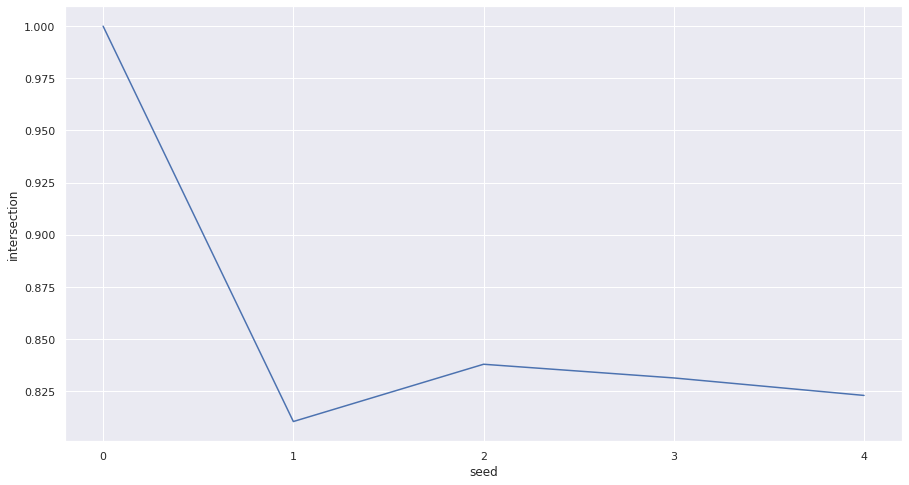

In [42]:
seed_df = pd.DataFrame()
seed_df['intersection'] = diff['se_seed']
seed_df['seed'] = seed_list

ax = sns.lineplot(data=seed_df, y='intersection', x='seed')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [109]:
## Add Ratio (Relu)
add_list = [0.5, 1.0]

In [113]:
## best setting
b_rm_ratio = 0.0
b_intra_weight = 0.5
b_fsim_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
b_activation = 'Relu'
bse_seed = 0

#### compare setting
rm_ratio = 0.0
intra_weight = 0.5
fsim_weight = 0.5
p_epochs = 20
p_batch_size = 256
activation = 'Relu'

diff['add_ratio'] = []
diff_seed = []
diff_add = []
for add in add_list:
    b_add_ratio = add
    b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
    b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
    b_graph = dgl.remove_self_loop(b_graph)
    
    add_ratio = add
    for seed in seed_list:
        graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_{activation}_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
        graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
        graph = dgl.remove_self_loop(graph)
        ir = Intersection(b_graph, graph)
        diff['add_ratio'].append(ir)
        diff_seed.append(seed)
        diff_add.append(add)

diff_add

[0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]

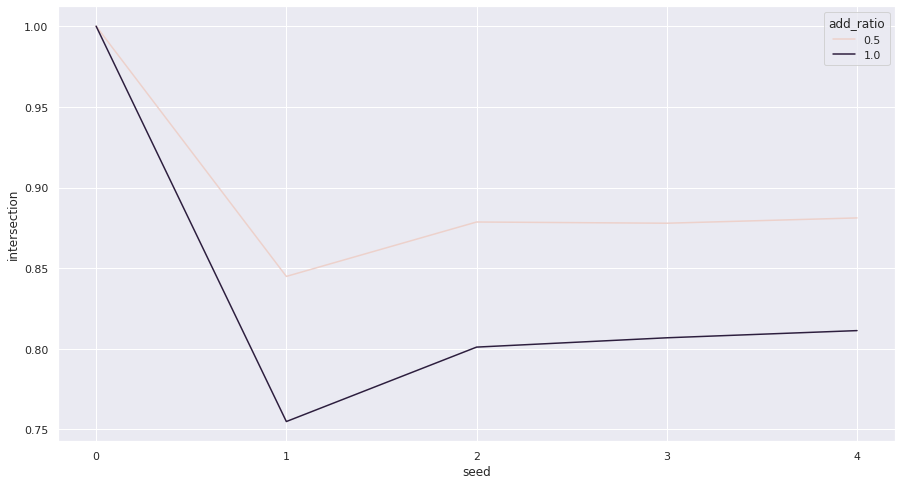

In [114]:
add_df = pd.DataFrame()
add_df['intersection'] = diff['add_ratio']
add_df['seed'] = diff_seed
add_df['add_ratio'] = diff_add

ax = sns.lineplot(data=add_df, y='intersection', x='seed', hue='add_ratio')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [112]:
## Add Ratio (Elu)

In [115]:
## best setting
b_rm_ratio = 0.0
b_intra_weight = 0.5
b_fsim_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
b_activation = 'Elu'
bse_seed = 0

#### compare setting
rm_ratio = 0.0
intra_weight = 0.5
fsim_weight = 0.5
p_epochs = 20
p_batch_size = 256
activation = 'Elu'

diff['add_ratio'] = []
diff_seed = []
diff_add = []

for add in add_list:
    b_add_ratio = add
    b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
    b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
    b_graph = dgl.remove_self_loop(b_graph)
    
    add_ratio = add
    for seed in seed_list:
        graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_{activation}_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
        graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
        graph = dgl.remove_self_loop(graph)
        ir = Intersection(b_graph, graph)
        diff['add_ratio'].append(ir)
        diff_seed.append(seed)
        diff_add.append(add)

diff_add

[0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]

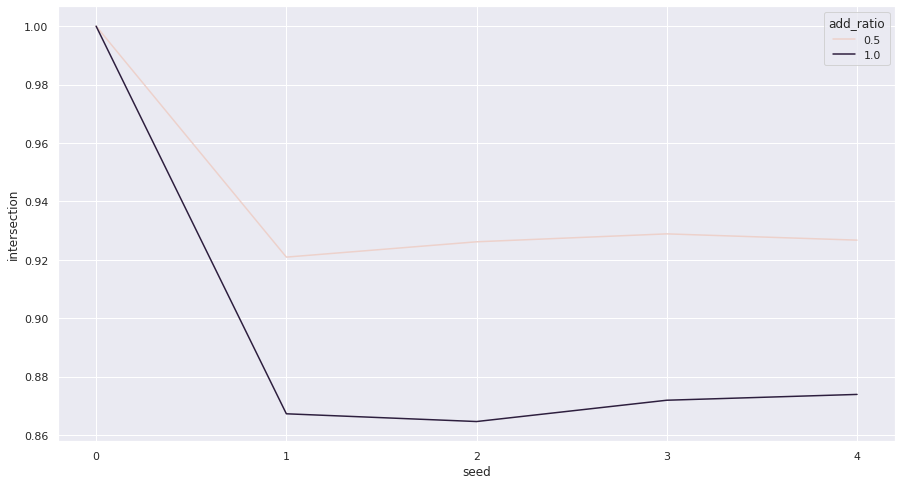

In [116]:
add_df = pd.DataFrame()
add_df['intersection'] = diff['add_ratio']
add_df['seed'] = diff_seed
add_df['add_ratio'] = diff_add

ax = sns.lineplot(data=add_df, y='intersection', x='seed', hue='add_ratio')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [53]:
## Intra Weight (Relu)

In [122]:
## best setting
b_add_ratio = 0.5
b_rm_ratio = 0.0
b_fsim_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
b_activation = 'Relu'
bse_seed = 0

#### compare setting
add_ratio = 0.5
rm_ratio = 0.0
fsim_weight = 0.5
p_epochs = 20
p_batch_size = 256
activation = 'Relu'

diff['intra_weight'] = []
diff_seed = []
diff_intra = []
for intra in intra_list:
    b_intra_weight = intra
    b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
    b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
    b_graph = dgl.remove_self_loop(b_graph)
    
    intra_weight = intra
    for seed in seed_list:
        graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_{activation}_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
        graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
        graph = dgl.remove_self_loop(graph)
        ir = Intersection(b_graph, graph)
        diff['intra_weight'].append(ir)
        diff_seed.append(seed)
        diff_intra.append(intra)


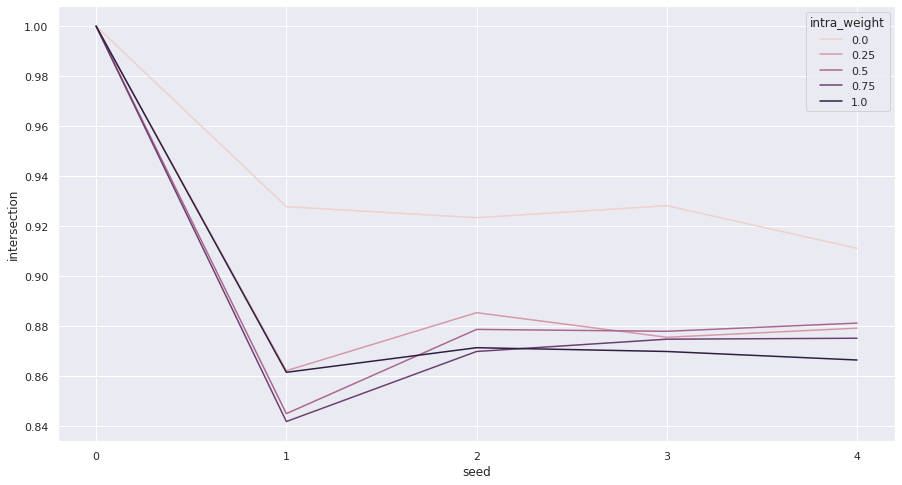

In [123]:
intra_df = pd.DataFrame()
intra_df['intersection'] = diff['intra_weight']
intra_df['seed'] = diff_seed
intra_df['intra_weight'] = diff_intra

ax = sns.lineplot(data=intra_df, y='intersection', x='seed', hue='intra_weight')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [ ]:
## Intra Weight (Elu)

In [124]:
## best setting
b_add_ratio = 0.5
b_rm_ratio = 0.0
b_fsim_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
b_activation = 'Elu'
bse_seed = 0

#### compare setting
add_ratio = 0.5
rm_ratio = 0.0
fsim_weight = 0.5
p_epochs = 20
p_batch_size = 256
activation = 'Elu'

diff['intra_weight'] = []
diff_seed = []
diff_intra = []
for intra in intra_list:
    b_intra_weight = intra
    b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
    b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
    b_graph = dgl.remove_self_loop(b_graph)
    
    intra_weight = intra
    for seed in seed_list:
        graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_{activation}_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
        graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
        graph = dgl.remove_self_loop(graph)
        ir = Intersection(b_graph, graph)
        diff['intra_weight'].append(ir)
        diff_seed.append(seed)
        diff_intra.append(intra)


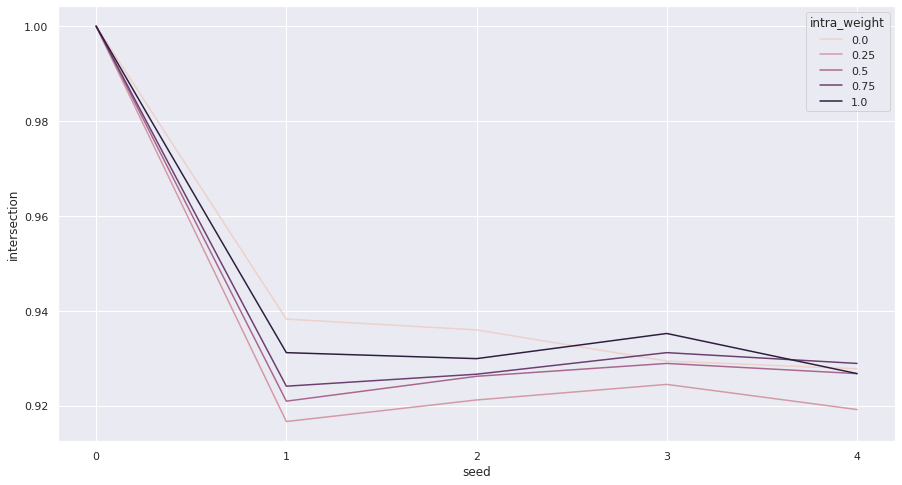

In [125]:
intra_df = pd.DataFrame()
intra_df['intersection'] = diff['intra_weight']
intra_df['seed'] = diff_seed
intra_df['intra_weight'] = diff_intra

ax = sns.lineplot(data=intra_df, y='intersection', x='seed', hue='intra_weight')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [57]:
## Feature Similarity Weight (Relu)

In [128]:
## best setting
b_add_ratio = 0.5
b_rm_ratio = 0.0
b_intra_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
b_activation = 'Relu'
bse_seed = 0

#### compare setting
add_ratio = 0.5
rm_ratio = 0.0
intra_weight = 0.5
p_epochs = 20
p_batch_size = 256
activation = 'Relu'

diff['fsim_weight'] = []
diff_seed = []
diff_fsim = []
for fsim in fsim_list:
    b_fsim_weight = fsim
    b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
    b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
    b_graph = dgl.remove_self_loop(b_graph)
    
    fsim_weight = fsim
    for seed in seed_list:
        graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_{activation}_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
        graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
        graph = dgl.remove_self_loop(graph)
        ir = Intersection(b_graph, graph)
        diff['fsim_weight'].append(ir)
        diff_seed.append(seed)
        diff_fsim.append(fsim)
        

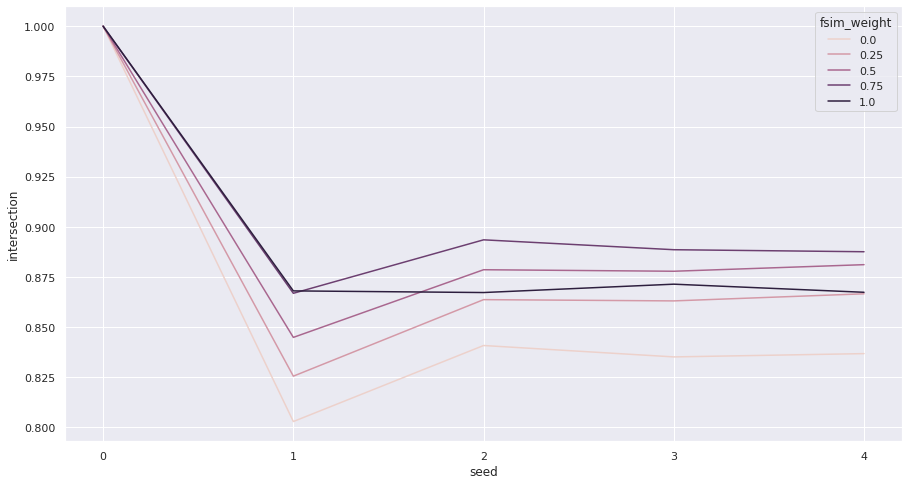

In [129]:
fsim_df = pd.DataFrame()
fsim_df['intersection'] = diff['fsim_weight']
fsim_df['seed'] = diff_seed
fsim_df['fsim_weight'] = diff_fsim

ax = sns.lineplot(data=fsim_df, y='intersection', x='seed', hue='fsim_weight')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [131]:
## Feature Similarity (Elu)## best setting

In [132]:
b_add_ratio = 0.5
b_rm_ratio = 0.0
b_intra_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
b_activation = 'Elu'
bse_seed = 0

#### compare setting
add_ratio = 0.5
rm_ratio = 0.0
intra_weight = 0.5
p_epochs = 20
p_batch_size = 256
activation = 'Elu'

diff['fsim_weight'] = []
diff_seed = []
diff_fsim = []
for fsim in fsim_list:
    b_fsim_weight = fsim
    b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
    b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
    b_graph = dgl.remove_self_loop(b_graph)
    
    fsim_weight = fsim
    for seed in seed_list:
        graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_{activation}_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
        graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
        graph = dgl.remove_self_loop(graph)
        ir = Intersection(b_graph, graph)
        diff['fsim_weight'].append(ir)
        diff_seed.append(seed)
        diff_fsim.append(fsim)

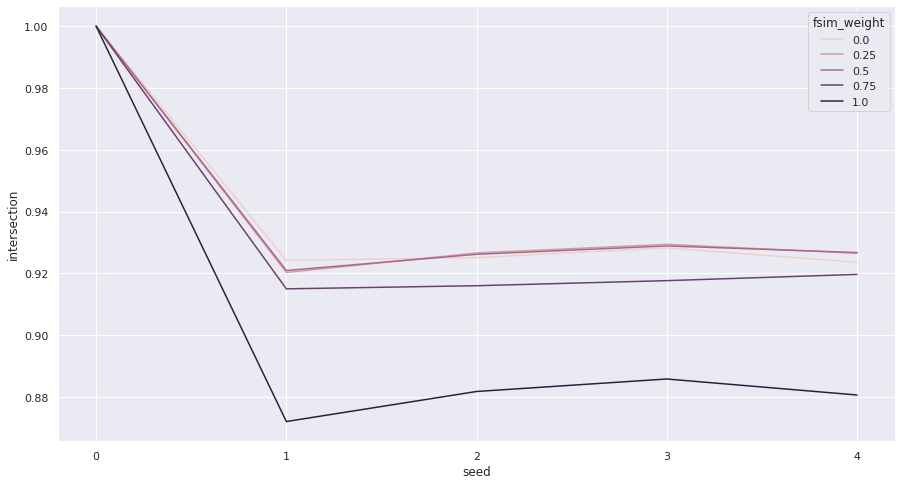

In [133]:
fsim_df = pd.DataFrame()
fsim_df['intersection'] = diff['fsim_weight']
fsim_df['seed'] = diff_seed
fsim_df['fsim_weight'] = diff_fsim

ax = sns.lineplot(data=fsim_df, y='intersection', x='seed', hue='fsim_weight')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [61]:
## Pretrain Epoch

In [ ]:
## best setting
b_add_ratio = 0.4
b_rm_ratio = 0.0
b_intra_weight = 0.75
b_fim_weight = 0.5
b_p_batch_size = 256
bse_seed = 0

#### compare setting
add_ratio = 0.4
rm_ratio = 0.0
intra_weight = 0.75
fim_weight = 0.5
p_batch_size = 256

diff['pretrain_epoch'] = []
diff_seed = []
diff_epoch = []
for epoch in epoch_list:
    b_p_epochs = epoch
    b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_Relu_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
    b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
    b_graph = dgl.remove_self_loop(b_graph)
    
    p_epochs = epoch
    for seed in seed_list:
        graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_Relu_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
        graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
        graph = dgl.remove_self_loop(graph)
        ir = Intersection(b_graph, graph)
        diff['pretrain_epoch'].append(ir)
        diff_seed.append(seed)
        diff_epoch.append(epoch)


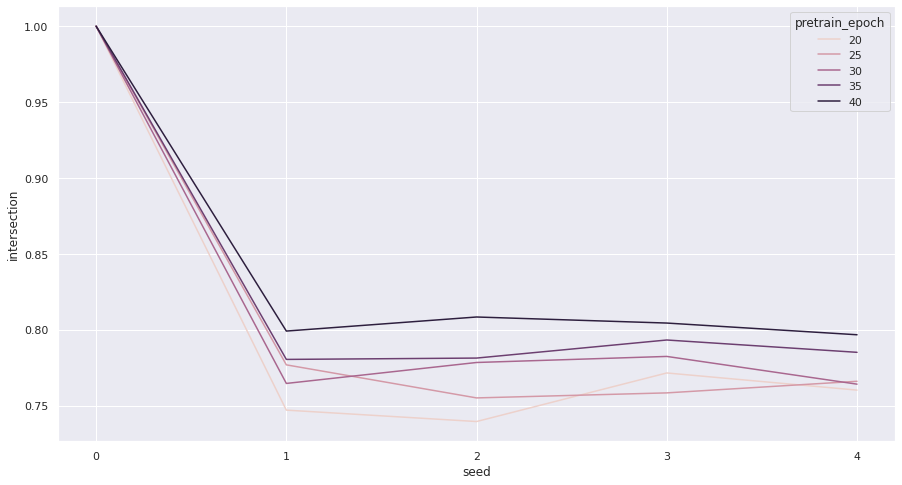

In [65]:
epoch_df = pd.DataFrame()
epoch_df['intersection'] = diff['pretrain_epoch']
epoch_df['seed'] = diff_seed
epoch_df['pretrain_epoch'] = diff_epoch

ax = sns.lineplot(data=epoch_df, y='intersection', x='seed', hue='pretrain_epoch')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [66]:
## Batch Size

In [68]:
## best setting
b_add_ratio = 0.4
b_rm_ratio = 0.0
b_intra_weight = 0.75
b_fim_weight = 0.5
b_p_epochs = 20
# b_p_batch_size = 256
bse_seed = 0

#### compare setting
add_ratio = 0.4
rm_ratio = 0.0
intra_weight = 0.75
fim_weight = 0.5
p_epochs = 20
# p_batch_size = 256

diff['batch_size'] = []
diff_seed = []
diff_batch = []
for batch in batch_list:
    b_p_batch_size = batch
    b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_Relu_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
    b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
    b_graph = dgl.remove_self_loop(b_graph)
    
    p_batch_size = batch
    for seed in seed_list:
        graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_Relu_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
        graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
        graph = dgl.remove_self_loop(graph)
        ir = Intersection(b_graph, graph)
        diff['batch_size'].append(ir)
        diff_seed.append(seed)
        diff_batch.append(p_batch_size)



[128, 128, 128, 128, 128, 256, 256, 256, 256, 256, 512, 512, 512, 512, 512]

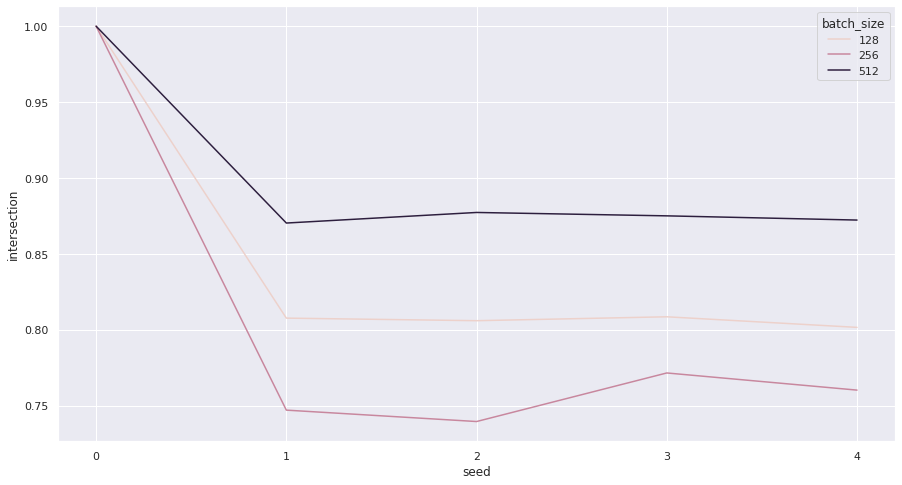

In [69]:
batch_df = pd.DataFrame()
batch_df['intersection'] = diff['batch_size']
batch_df['seed'] = diff_seed
batch_df['batch_size'] = diff_batch

ax = sns.lineplot(data=batch_df, y='intersection', x='seed', hue='batch_size')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [228]:
diff = {}
## best setting
b_add_ratio = 0.5
b_rm_ratio = 0.0
b_intra_weight = 0.5
b_fsim_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
bse_seed = 0
b_activation = 'Relu'
b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
b_graph = dgl.remove_self_loop(b_graph)

## compare setting
add_ratio = 0.5
rm_ratio = 0.0
intra_weight = 0.5
fsim_weight = 0.5
p_epochs = 20
p_batch_size = 256
activation = 'Relu'
diff['se_seed'] = []
act_list = []
for seed in seed_list:
    graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_{activation}_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
    graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
    graph = dgl.remove_self_loop(graph)
    ir = Intersection(b_graph, graph)
    diff['se_seed'].append(ir)
    act_list.append(activation)

diff['se_seed']

[1.0,
 0.8791208791208791,
 0.8839206770241252,
 0.8918782367058229,
 0.883289124668435]

In [ ]:
## best setting
b_add_ratio = 0.5
b_rm_ratio = 0.0
b_intra_weight = 0.5
b_fsim_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
bse_seed = 0
b_activation = 'Elu'
b_graph_name = f'PR-_se_seed{bse_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
b_graph = dgl.load_graphs(f'{graph_folder}{dataset}/{b_graph_name}')[0][0]
b_graph = dgl.remove_self_loop(b_graph)

## compare setting
add_ratio = 0.5
rm_ratio = 0.0
intra_weight = 0.5
fsim_weight = 0.5
p_epochs = 20
p_batch_size = 256
activation = 'Elu'

for seed in seed_list:
    graph_name = f'PR-_se_seed{seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_{activation}_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
    graph = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
    graph = dgl.remove_self_loop(graph)
    ir = Intersection(b_graph, graph)
    diff['se_seed'].append(ir)
    act_list.append(activation)

diff['se_seed']

In [ ]:
seed_df = pd.DataFrame()
seed_df['intersection'] = diff['se_seed']
seed_df['seed'] = seed_list*2
seed_df['activation'] = act_list

ax = sns.lineplot(data=seed_df, y='intersection', x='seed', hue='activation')
ax.set_xticks(seed_list)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

In [152]:
def ADD_Edges(ori_g, new_g):
    
    assert ori_g.num_edges() <= new_g.num_edges()

    ori_src, ori_dst = ori_g.edges()
    ori_src = ori_src.numpy()
    ori_dst = ori_dst.numpy()
    assert len(ori_src) == len(ori_dst)
    ori_edges = [(ori_src[i], ori_dst[i]) for i in range(len(ori_src))]

    new_src, new_dst = new_g.edges()
    new_src =new_src.numpy()
    new_dst = new_dst.numpy()
    assert len(new_src) == len(new_dst)
    new_edges = [(new_src[i], new_dst[i]) for i in range(len(new_src))]

    add_edge_set = list(set(new_edges) - set(ori_edges))

    return add_edge_set

In [134]:
## Similarirty Adjacency Matrix (Relu)

In [147]:
g_ori

Graph(num_nodes=2708, num_edges=10556,
      ndata_schemes={}
      edata_schemes={})

In [209]:
b_add_ratio = 0.5
b_rm_ratio = 0.0
b_intra_weight = 0.5
b_fsim_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
b_activation = 'Relu'
b_se_seed = 0
graph_name = f'PR-_se_seed{b_se_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
g_new = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
g_new = dgl.remove_self_loop(g_new)

sim_adj = g_new.ndata['sim'].numpy()
add_edge_list = ADD_Edges(g_ori, g_new)

In [210]:
add_dict = {}
for edge in add_edge_list:
    src, dst = edge
    sim_value = sim_adj[src, dst]
    add_dict[edge] = sim_value

sort_add_dict = sorted(add_dict.items(), key=lambda item:item[1])

In [213]:
add_ratio = 0.5
rm_ratio = 0.0
intra_weight = 0.5
fsim_weight = 0.5
p_epochs = 20
p_batch_size = 256
activation = 'Relu'
se_seed = 1
graph_name_c = f'PR-_se_seed{se_seed}_lr0.001_bsz{p_batch_size}_pi{p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{intra_weight}_ncek16382_fanout20_40_prdo0_act_{activation}_d64_GR-fsim_norm1_fsim_weight{fsim_weight}_add{add_ratio}_rm{rm_ratio}.bin'
g_new_c = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name_c}')[0][0]
g_new_c = dgl.remove_self_loop(g_new_c)

sim_adj_c = g_new_c.ndata['sim'].numpy()
add_edge_list_c = ADD_Edges(g_ori, g_new_c)


In [214]:
add_dict_c = {}
for edge in add_edge_list_c:
    src, dst = edge
    sim_value = sim_adj_c[src, dst]
    add_dict_c[edge] = sim_value

sort_add_dict_c = sorted(add_dict_c.items(), key=lambda item:item[1])

In [218]:
inter = set(add_edge_list) & set(add_edge_list_c)
diff = set(add_edge_list) - inter
diff_dict = {}
for e in list(diff):
    diff_dict[e] = add_dict[e]

sort_diff_dict = sorted(diff_dict.items(), key=lambda item:item[1])
sort_diff_dict

[((329, 2079), 0.9877913),
 ((2079, 329), 0.9877913),
 ((2060, 2062), 0.9877914),
 ((2061, 2062), 0.9877914),
 ((2062, 2060), 0.9877914),
 ((2062, 2061), 0.9877914),
 ((689, 2525), 0.9877964),
 ((2525, 689), 0.9877964),
 ((656, 1346), 0.9877995),
 ((1346, 656), 0.9877995),
 ((1771, 1777), 0.98780084),
 ((1777, 1771), 0.98780084),
 ((1292, 1148), 0.9878012),
 ((1148, 1292), 0.9878012),
 ((1041, 59), 0.9878017),
 ((59, 1041), 0.9878017),
 ((998, 1317), 0.98780334),
 ((1317, 998), 0.98780334),
 ((655, 1805), 0.98780954),
 ((1805, 655), 0.98780954),
 ((53, 853), 0.98781693),
 ((853, 53), 0.98781693),
 ((1346, 556), 0.98781884),
 ((556, 1346), 0.98781884),
 ((556, 1656), 0.98782456),
 ((1584, 556), 0.98782456),
 ((556, 1584), 0.98782456),
 ((1656, 556), 0.98782456),
 ((2292, 2233), 0.987825),
 ((2233, 2292), 0.987825),
 ((1339, 1471), 0.9878261),
 ((1471, 1339), 0.9878261),
 ((796, 1720), 0.98782945),
 ((796, 1719), 0.98782945),
 ((1040, 796), 0.98782945),
 ((1719, 796), 0.98782945),
 ((796

In [222]:
b_add_ratio = 0.5
b_rm_ratio = 0.0
b_intra_weight = 0.5
b_fsim_weight = 0.5
b_p_epochs = 20
b_p_batch_size = 256
b_activation = 'Elu'
b_se_seed = 0
graph_name = f'PR-_se_seed{b_se_seed}_lr0.001_bsz{b_p_batch_size}_pi{b_p_epochs}_encGCN_dec-l2_hidden48-prt_intra_w-{b_intra_weight}_ncek16382_fanout20_40_prdo0_act_{b_activation}_d64_GR-fsim_norm1_fsim_weight{b_fsim_weight}_add{b_add_ratio}_rm{b_rm_ratio}.bin'
g_new = dgl.load_graphs(f'{graph_folder}{dataset}/{graph_name}')[0][0]
g_new = dgl.remove_self_loop(g_new)

sim_adj = g_new.ndata['sim'].numpy()
add_edge_list = ADD_Edges(g_ori, g_new)

In [223]:
add_dict = {}
for edge in add_edge_list:
    src, dst = edge
    sim_value = sim_adj[src, dst]
    add_dict[edge] = sim_value

sort_add_dict = sorted(add_dict.items(), key=lambda item:item[1])

In [ ]:
sort_add_dict